<a href="https://colab.research.google.com/github/kunallohar862/Q2_TechTitans/blob/main/Edema_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
import seaborn as sns
from sklearn.metrics import confusion_matrix
import json
from tensorflow.keras.models import model_from_json

In [61]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Dev-o-Thon/archive/img_data'
files = os.listdir(data_path)

In [62]:
dataLabel = {0:'NoEdemea', 1:'Edema'}

In [63]:
image_array = []
label_array = []

label_mapping = {}

for index, subfolder in enumerate(os.listdir(data_path)):
    subfolder_path = os.path.join(data_path, subfolder)

    if os.path.isdir(subfolder_path):
        label_mapping[subfolder] = index

        for image_file in tqdm.tqdm(os.listdir(subfolder_path)):
            image_path = os.path.join(subfolder_path, image_file)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (62, 62))
            image_array.append(resized_image)
            label_array.append(index)

image_array = np.array(image_array)
label_array = np.array(label_array)

print("Shape of the image array:", image_array.shape)
print("Shape of the label array:", label_array.shape)

100%|██████████| 500/500 [00:14<00:00, 34.70it/s]

Shape of the image array: (1000, 62, 62, 3)
Shape of the label array: (1000,)


In [66]:
label_to_text={0:"NoEdema",1:"Edema"}
label_to_text[1]

'Edema'

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(image_array,label_array,test_size=0.2)

In [68]:
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

model=Sequential()
model.add(Conv2D(32,input_shape=(62,62,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
# create a model checkpoint to save model
ckp_path="trained_model/model"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckp_path,
                                                   monitor="val_mae",
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="auto")
# this checkpoint save model when val_mae is lower then best val_mae
#run


In [70]:
# now we will define learning rate reducer
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,
                                              monitor="val_mae",
                                              mode="auto",
                                              cooldown=0,
                                              patience=5,
                                              verbose=1,
                                              min_lr=1e-6)
# this will decrease learning rate when val_mae does't decrease durning last 5 epoch
# verbose is use to show val_mae every epoch

In [75]:
EPOCHS=10
BATCH_SIZE=64
# start training
history=model.fit(X_train,Y_train,
                 validation_data=(X_test,Y_test),
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[model_checkpoint,reduce_lr])
#run

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 0.3702 - accuracy: 0.8562

13/13 [==============================] - 5s 357ms/step - loss: 0.3702 - accuracy: 0.8562 - val_loss: 0.8046 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 0.3331 - accuracy: 0.8900

13/13 [==============================] - 5s 376ms/step - loss: 0.3331 - accuracy: 0.8900 - val_loss: 0.9184 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.3101 - accuracy: 0.9050

13/13 [==============================] - 6s 441ms/step - loss: 0.3101 - accuracy: 0.9050 - val_loss: 0.8154 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 0.3002 - accuracy: 0.9050

13/13 [==============================] - 5s 357ms/step - loss: 0.3002 - accuracy: 0.9050 - val_loss: 0.8389 - val_accuracy: 0.5400 - lr: 0.0010
Epoch 5/10
13/13 [==============================] - ETA: 0s - loss: 0.2938 - accuracy: 0.9025

13/13 [==============================] - 6s 445ms/step - loss: 0.2938 - accuracy: 0.9025 - val_loss: 0.7559 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 6/10
13/13 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.8988

13/13 [==============================] - 5s 392ms/step - loss: 0.2960 - accuracy: 0.8988 - val_loss: 0.5577 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 7/10
13/13 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.9062

13/13 [==============================] - 5s 375ms/step - loss: 0.2863 - accuracy: 0.9062 - val_loss: 0.4931 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 8/10
13/13 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.9250

13/13 [==============================] - 6s 508ms/step - loss: 0.2594 - accuracy: 0.9250 - val_loss: 0.5860 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 9/10
13/13 [==============================] - ETA: 0s - loss: 0.2421 - accuracy: 0.9362

13/13 [==============================] - 5s 371ms/step - loss: 0.2421 - accuracy: 0.9362 - val_loss: 0.6182 - val_accuracy: 0.7150 - lr: 0.0010
Epoch 10/10
13/13 [==============================] - ETA: 0s - loss: 0.2251 - accuracy: 0.9413

13/13 [==============================] - 6s 476ms/step - loss: 0.2251 - accuracy: 0.9413 - val_loss: 0.4489 - val_accuracy: 0.8150 - lr: 0.0010


In [76]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("model_weights.h5")

print("Model architecture and weights saved successfully.")

Model architecture and weights saved successfully.


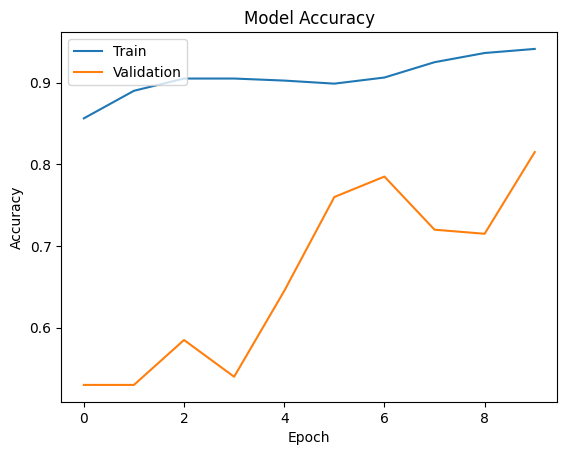

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

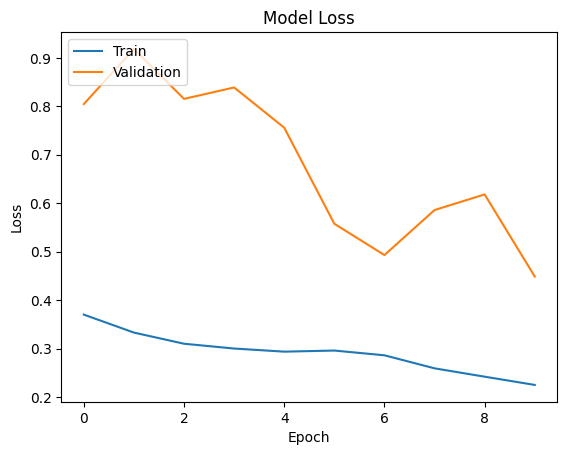

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 47ms/step


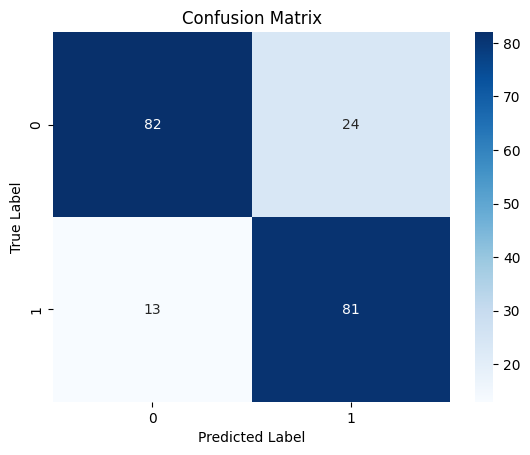

In [85]:
y_pred = model.predict(X_test)
y_pred_binary = [int(round(p[0])) for p in y_pred]
cm = confusion_matrix(Y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.815


1/1 [==============================] - 0s 367ms/step


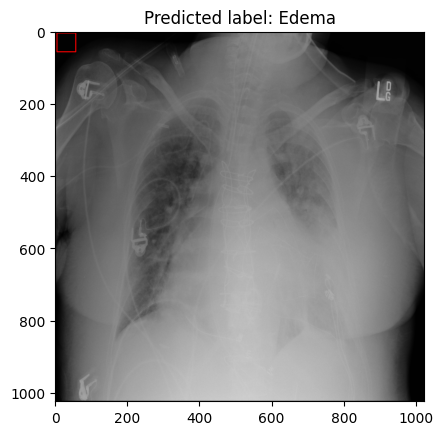

In [121]:
with open('model_architecture.json', 'r') as json_file:
  model_json = json_file.read()

model = model_from_json(model_json)
model.load_weights('model_weights.h5')

image_path = '/content/drive/MyDrive/Colab Notebooks/Dev-o-Thon/archive/img_data/Edema/00000032_034.png'
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (62, 62))
image_array = np.array([resized_image])
prediction = model.predict(image_array)

label_to_text = {0: 'NoEdema', 1: 'Edema'}
predicted_label = label_to_text[int(round(prediction[0][0]))]

if predicted_label == 'Edema':
    top_left = (5, 5)
    bottom_right = (57, 57)
    cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Predicted label: " + predicted_label)
plt.show()